<a href="https://colab.research.google.com/github/IrigoyenCodes/ArtificialIntelligence/blob/main/CIFAR10conKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def display_sample_images():
    """Display 25 sample images from the CIFAR-10 dataset"""
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        plt.xlabel(class_names[train_labels[i][0]])
    plt.tight_layout()
    plt.show()

Displaying sample CIFAR-10 images...


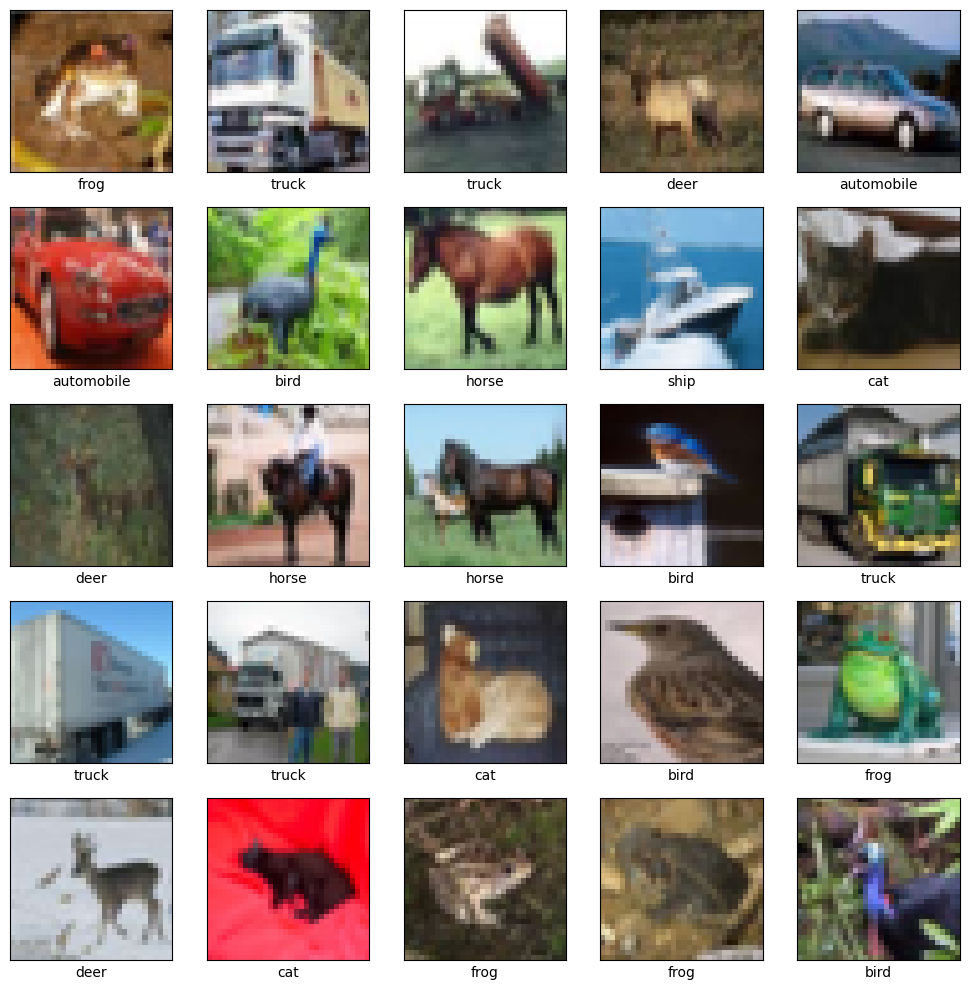


Applying manual convolution kernels...


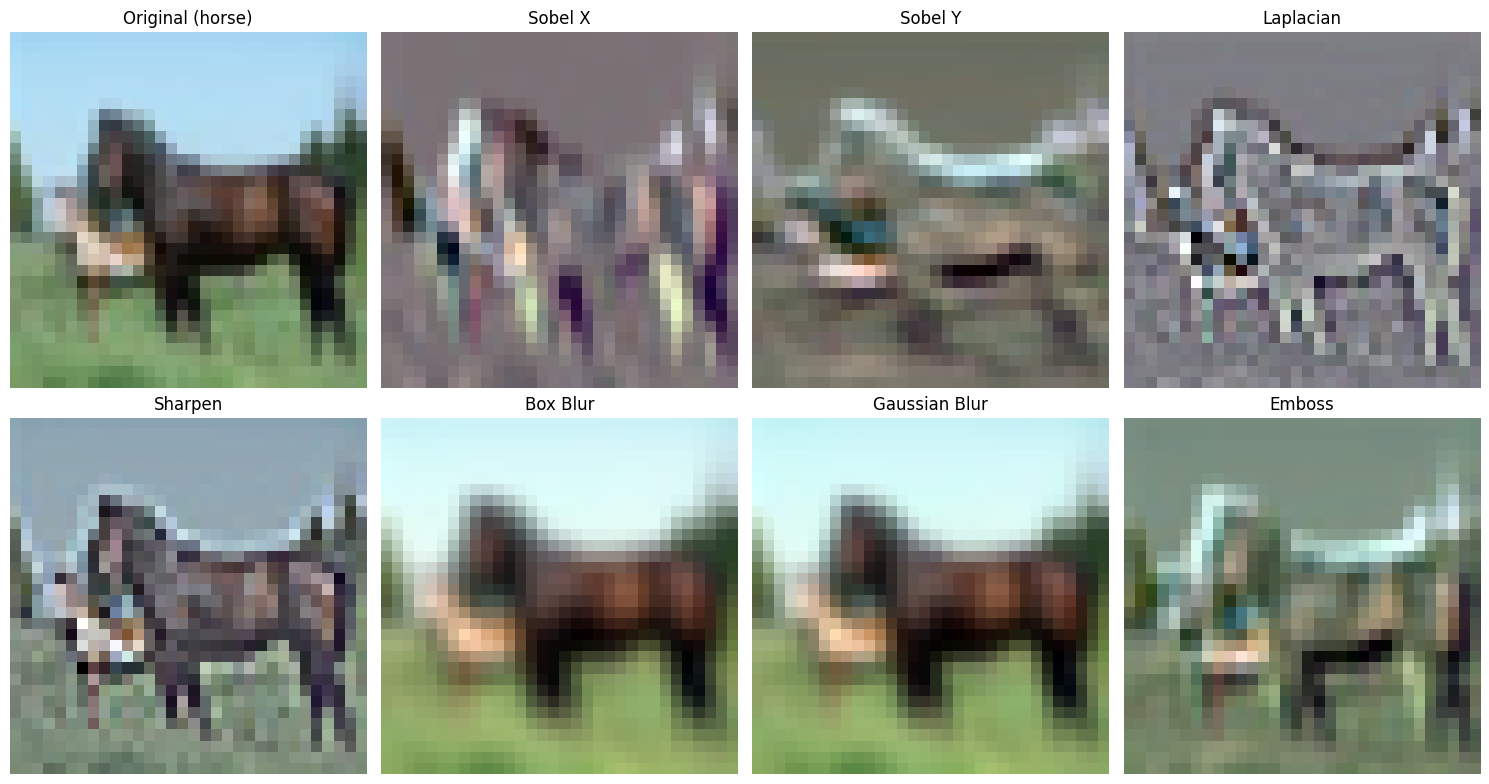


Building and training CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.3347 - loss: 1.7929 - val_accuracy: 0.5055 - val_loss: 1.3687
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.5371 - loss: 1.2847 - val_accuracy: 0.5872 - val_loss: 1.1659
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.6160 - loss: 1.0914 - val_accuracy: 0.6400 - val_loss: 1.0392
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.6626 - loss: 0.9742 - val_accuracy: 0.6580 - val_loss: 0.9926
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6883 - loss: 0.8918 - val_accuracy: 0.6843 - val_loss: 0.9068

Visualizing CNN filters...


AttributeError: The layer sequential has never been called and thus has no defined input.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0



def apply_kernel(image, kernel):
    """Apply convolution kernel to each channel of an image"""
    if len(image.shape) == 3:  # Color image (H, W, C)
        result = np.zeros_like(image)
        for c in range(image.shape[2]):  # Apply to each channel
            channel = image[:, :, c]
            filtered = signal.convolve2d(channel, kernel, mode='same', boundary='symm')
            # Normalize channel result
            if filtered.max() != filtered.min():
                filtered = (filtered - filtered.min()) / (filtered.max() - filtered.min())
            result[:, :, c] = filtered
        return result
    else:  # Grayscale image
        filtered = signal.convolve2d(image, kernel, mode='same', boundary='symm')
        # Normalize result
        if filtered.max() != filtered.min():
            filtered = (filtered - filtered.min()) / (filtered.max() - filtered.min())
        return filtered

def visualize_kernels_on_cifar(image_idx=0):
    """Apply various kernels to a CIFAR-10 image and visualize results"""
    # Define various convolution kernels
    kernels = {
        'sobel_x': np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]]),

        'sobel_y': np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]]),

        'laplacian': np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]]),

        'sharpen': np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]]),

        'box_blur': np.ones((3, 3)) / 9,

        'gaussian_blur': np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]]) / 16,

        'emboss': np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
    }

    # Get the specified image
    image = train_images[image_idx]
    image_label = class_names[train_labels[image_idx][0]]

    # Apply each kernel
    kernel_names = list(kernels.keys())
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.flatten()

    # Display original image
    axes[0].imshow(image)
    axes[0].set_title(f'Original ({image_label})')
    axes[0].axis('off')

    # Apply each kernel and display results
    for i, name in enumerate(kernel_names):
        filtered_image = apply_kernel(image, kernels[name])
        axes[i+1].imshow(filtered_image)
        axes[i+1].set_title(name.replace('_', ' ').title())
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def build_cnn_model():
    """Build a simple CNN model for CIFAR-10 classification"""
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

def visualize_cnn_filters(model, layer_name, image_idx=0):
    """Visualize what the CNN filters in a specific layer are detecting"""
    # Get the layer output
    layer_outputs = [layer.output for layer in model.layers if layer.name == layer_name]
    if not layer_outputs:
        print(f"Layer {layer_name} not found. Available layers:")
        for layer in model.layers:
            print(f"- {layer.name}")
        return

    # Create a model that will return the layer outputs given an input image
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Get the specified image and prepare it for the model
    img = train_images[image_idx].reshape(1, 32, 32, 3)

    # Get activations for this image
    activations = activation_model.predict(img)
    first_layer_activation = activations[0]

    # Plot the feature maps
    n_features = min(16, first_layer_activation.shape[-1])  # Display at most 16 features
    fig = plt.figure(figsize=(12, 8))

    # Original image for reference
    plt.subplot(4, 5, 1)
    plt.imshow(train_images[image_idx])
    plt.title(f"Original ({class_names[train_labels[image_idx][0]]})")
    plt.axis('off')

    # Display feature maps
    for i in range(n_features):
        plt.subplot(4, 5, i + 2)
        plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
        plt.title(f"Feature {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def compare_manual_and_learned_filters(model, input_image_idx=0):
    """Compare manual filters with learned CNN filters on the same image"""
    # Define manual kernels
    kernels = {
        'sobel_x': np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]]),

        'sobel_y': np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]]),

        'laplacian': np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]]),

        'sharpen': np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
    }

    # Get the image
    image = train_images[input_image_idx]

    # Get the first Conv2D layer weights (filters)
    first_conv_layer = model.layers[0]
    filters, biases = first_conv_layer.get_weights()

    # Number of filters to show (both manual and learned)
    n_filters = min(4, filters.shape[-1])

    # Setup the figure
    fig, axes = plt.subplots(3, n_filters, figsize=(15, 10))

    # Display original image at the center-left
    plt.subplot(3, n_filters, 1)
    plt.imshow(image)
    plt.title(f'Original ({class_names[train_labels[input_image_idx][0]]})')
    plt.axis('off')

    # Apply and display manual filters
    manual_filter_names = list(kernels.keys())[:n_filters]
    for i, name in enumerate(manual_filter_names):
        filtered = apply_kernel(image, kernels[name])
        axes[0, i].imshow(filtered)
        axes[0, i].set_title(f'Manual: {name.replace("_", " ").title()}')
        axes[0, i].axis('off')

    # Display learned CNN filters
    for i in range(n_filters):
        # Display the filter
        f = filters[:, :, :, i]
        # Scale the filter values to [0, 1] for visualization
        f = (f - f.min()) / (f.max() - f.min() + 1e-5)
        # Each filter has 3 channels (for RGB), we'll display them separately
        for j in range(3):
            axes[1, i].imshow(f[:, :, j], cmap='viridis')
        axes[1, i].set_title(f'Learned Filter {i+1}')
        axes[1, i].axis('off')

    # Apply learned filters manually to see what they're detecting
    # We'll use the first channel filter for simplicity
    for i in range(n_filters):
        # Get just the first channel of the filter for visualization purposes
        simplified_filter = filters[:, :, 0, i]
        # Apply this filter to the image (just to see what it highlights)
        filtered = apply_kernel(image[:,:,0], simplified_filter)
        axes[2, i].imshow(filtered, cmap='viridis')
        axes[2, i].set_title(f'Applied Filter {i+1}')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.suptitle("Comparing Manual vs. Learned CNN Filters", fontsize=16, y=1.02)
    plt.show()

def main():
    # Display sample CIFAR-10 images
    print("Displaying sample CIFAR-10 images...")
    display_sample_images()

    # Apply manual kernels to a CIFAR-10 image
    print("\nApplying manual convolution kernels...")
    visualize_kernels_on_cifar(image_idx=12)  # Using image index 12

    # Build and train a simple CNN model
    print("\nBuilding and training CNN model...")
    model = build_cnn_model()
    history = model.fit(train_images, train_labels, epochs=5,
                       validation_data=(test_images, test_labels),
                       batch_size=64, verbose=1)

    # Visualize what CNN filters are detecting
    print("\nVisualizing CNN filters...")
    visualize_cnn_filters(model, 'conv2d', image_idx=12)

    # Compare manual and learned filters
    print("\nComparing manual vs. learned filters...")
    compare_manual_and_learned_filters(model, input_image_idx=12)

if __name__ == "__main__":
    main()